# CMPE 257 Homework 2

## Question 1

### a. Load dataset from csv file.

Note: Please load the dataset from the URL as shown in the demo 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.read_csv('datasetHW2.csv')
data.head()
data.shape


(20640, 10)

### b. Remove the header which is 0th row.

In [3]:
data_new = pd.read_csv('datasetHW2.csv',header=None)
data_new = data_new.iloc[1:]
data_new

,0,1,2,3,4,5,6,7,8,9
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
5,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20636,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20637,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20638,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
20639,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### c. Split the dataset into 70:30 training set and test set (non-repetitive random selection).

In [11]:
from sklearn.model_selection import train_test_split
#data = pd.read_csv('datasetHW2.csv')
#Reorder columns in given dataset to bring house_value to last column
data = data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity','median_house_value']]
data.head()
#Converting Categorical variables into Numerical data using Pandas get_dummies
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LabelEncoder_X= LabelEncoder()
data['ocean_proximity'] = pd.get_dummies(data['ocean_proximity'], prefix_sep='_', drop_first=True)
x = data.iloc[:,0:9] # Select all features except median_house_value 
y = data.iloc[:,9:10] # Selecting target (median_house_value)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)# To ensure datasets are a representative sample of the original dataset
print("Sample Training set values")
print(X_train.head())
print("\n")
print("Sample test set values")
print(X_test.head())

Sample Training set values
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5748     -118.27     34.16                15.0       5036.0          1299.0   
5592     -118.26     33.80                41.0       2004.0           481.0   
2110     -119.75     36.75                49.0       2331.0           460.0   
13901    -116.56     34.06                15.0       6928.0          1529.0   
18425    -121.83     37.26                 7.0       3609.0           751.0   

       population  households  median_income  ocean_proximity  
5748       3164.0      1175.0         2.9148                0  
5592       1658.0       456.0         3.1779                0  
2110       1290.0       477.0         2.5111                1  
13901      2568.0      1075.0         2.5405                1  
18425      1739.0       682.0         4.5033                0  


Sample test set values
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4712     -

 d. Plot each feature against the target in the training set.

Number of missing values in each feature column
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,342200.0


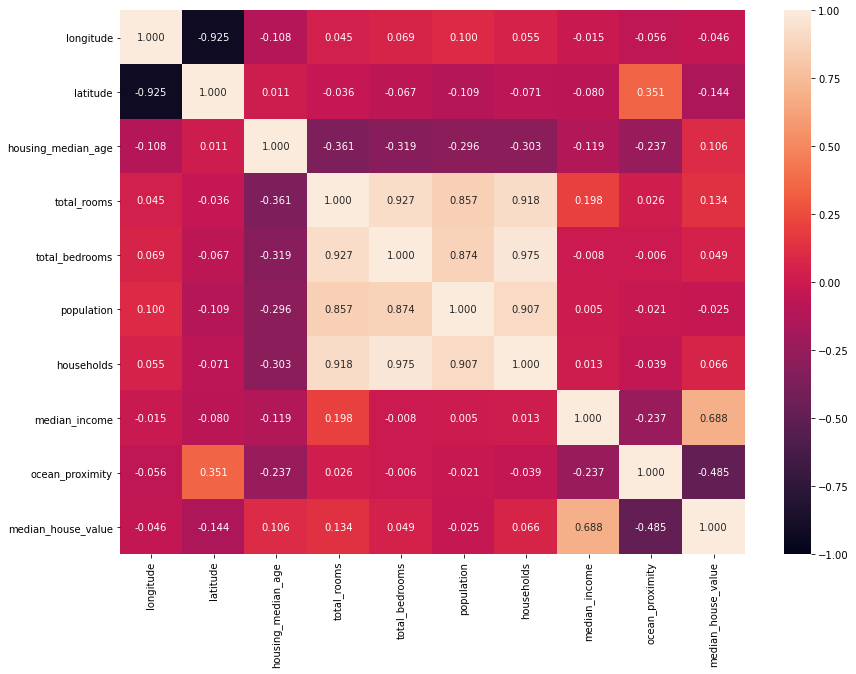

In [12]:

# Check if data has any missing values
print("Number of missing values in each feature column")
print(data.isnull().sum()) # It can be observed that there are missing values in total_bedrooms feature
#Pre-processing data - filling missing values with mean values of the columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(data[['total_bedrooms']])
data['total_bedrooms'] = imputer.transform(data[['total_bedrooms']])
#Plotting correlation matrix of the data
plt.figure(figsize = (14, 10))
sbn.heatmap(data.corr(),annot=True,vmin = -1, vmax = 1, fmt = '.3f')
data.head()

### e. Write down your observations on the above plots to find which features had maximum influence on the target.

In [ ]:
1.Basis above correlation matrix it can be observed that median income has maximum positive influence on target (median_house_value) 
2.ocean_proximity has negative influence on the target
3.Multicollinearity is observed between following features
*total_rooms & households
*total_rooms & total_bedrooms
*population & households

### f. What kind of a problem is this? (eg. classification, regression, clustering, etc).

In [ ]:
This is example of regression problem as output target variable is numerical and continuous value

### g. Get the quick description of data using info() and description() functions.

In [213]:
data.info() # Observations : Categorical variables are by default set to object type
data.describe() # Gives information of mean,std deviation and various metrics of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  uint8  
 9   median_house_value  20640 non-null  float64
dtypes: float64(9), uint8(1)
memory usage: 1.4 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.317393,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,0.465473,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,500001.000000


### h. Perform min-max normalization on features and target.

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print("Normalized feature values")
print(x_scaled[0:10,])
print("\n")
scaler.fit(y)
y_scaled = scaler.transform(y)
print("Normalized target values")
print(y_scaled[0:10,])


Normalized feature values
[[0.21115538 0.5674814  0.78431373 0.02233074 0.01986344 0.00894083
  0.02055583 0.53966842 0.        ]
 [0.21215139 0.565356   0.39215686 0.18050257 0.17147734 0.0672104
  0.18697583 0.53802706 0.        ]
 [0.21015936 0.5642933  1.         0.03726029 0.02932961 0.01381765
  0.02894261 0.46602805 0.        ]
 [0.20916335 0.5642933  1.         0.03235159 0.03631285 0.01555537
  0.03584937 0.35469856 0.        ]
 [0.20916335 0.5642933  1.         0.04132967 0.04329609 0.01575156
  0.04242723 0.23077613 0.        ]
 [0.20916335 0.5642933  1.         0.02332265 0.03289882 0.01149135
  0.03157375 0.24392077 0.        ]
 [0.20916335 0.56323061 1.         0.06442342 0.07572936 0.03057821
  0.08436112 0.21787286 0.        ]
 [0.20916335 0.56323061 1.         0.07889516 0.10645562 0.03234396
  0.10623253 0.18069406 0.        ]
 [0.20816733 0.56323061 0.80392157 0.06493209 0.10304159 0.03371731
  0.0976813  0.1089985  0.        ]
 [0.20916335 0.56323061 1.         0.09

### i. Describe rules of NumPy Broadcasting.

1.When NumPy expects arrays of the same shape but finds that this is not the case, it applies the broadcasting rules
2.Broadcasting solves the problem of arithmetic between arrays of differing shapes by in effect replicating the smaller array along the last mismatched dimension.
Rules of broadcasting :
1.The dimensions are considered in reverse order, starting with the trailing dimension; for example, looking at columns before rows in a two-dimensional case.
2.For the arrays that do not have the same rank, then  1 will be prepended to the smaller ranking arrays until their ranks match.
Example : Array A - rank is 2 (2,3)
          Array B - rank is 1 (,3). 1 will be prepended to the dimension of array B to make it (1,3)
3.When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other
Example : Array A (3,3)
          Array B (1,3).Array B is stretched and frist row is replicated 3 times to match Array A
Limitations of broadcasting :
Broadcasting, can only be performed when the shape of each dimension in the arrays are equal or one has the dimension size of 1

### j. Describe the purpose of numpy.reshape with a valid example


In [202]:
#The numpy.reshape() function is used to give a new shape to an array without changing its data.
import numpy as np
x = np.array([[2,3,4], [5,6,7]]) # Declaring array of dimensions (2,3)
print("Original Array")
print(x)
print("\n")
x_reshape = np.reshape(x,(3,2)) # Reshaping array dimensions
print("Reshaped array")
print(x_reshape)

Original Array
[[2 3 4]
 [5 6 7]]


Reshaped array
[[2 3]
 [4 5]
 [6 7]]


In [14]:
#Converting Categorical variables into Numerical data using OneHotEncoder
data_new = pd.read_csv('datasetHW2.csv')
data_new
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
LabelEncoder= LabelEncoder()
data_new['ocean_proximity'] = data_new['ocean_proximity'].astype('category')
data_new['ocean_proximity'] = LabelEncoder.fit_transform(data_new['ocean_proximity'])
onehotencoder = OneHotEncoder()
enc_df = pd.DataFrame(onehotencoder.fit_transform(data_new[['ocean_proximity']]).toarray())
data_new = data_new.join(enc_df)
data_new= data_new.drop(['ocean_proximity'], axis=1)
data_new

# OneHotEncoder can also be used to encode categorical features  but get_dummies of pandas was used in this example




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


## Question 2
Boston housing dataset is a famous dataset widely used for machine learning. In this problem, you will train
a linear regression model that predicts the house price using the Boston housing dataset.

a. Load Boston house prices dataset. Plot each feature against the target in the training set.  Write down your observations on the above plots to find which features had maximum influence on the target.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

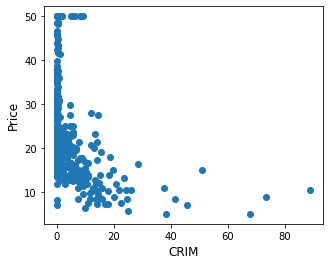

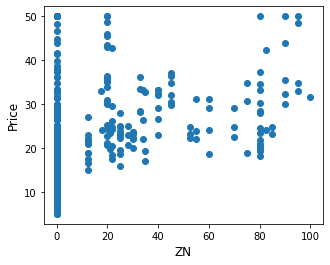

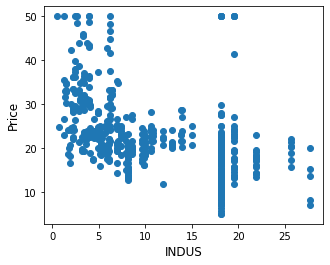

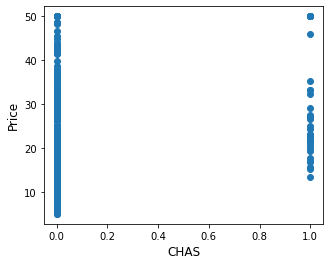

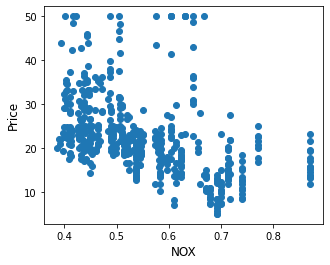

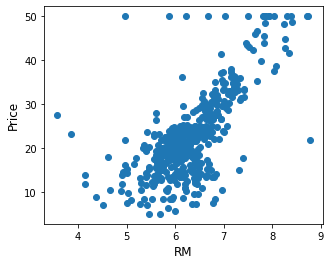

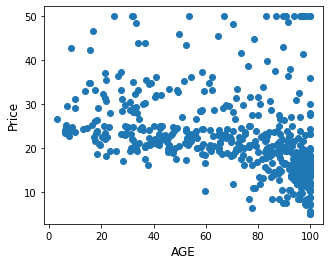

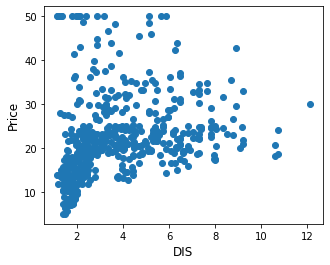

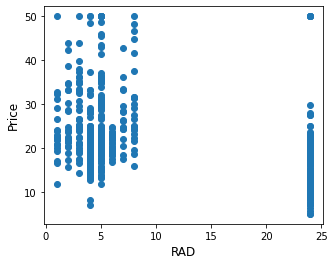

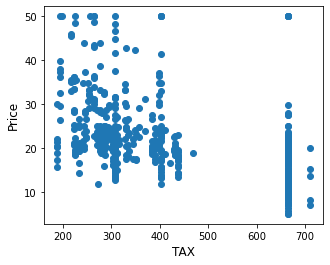

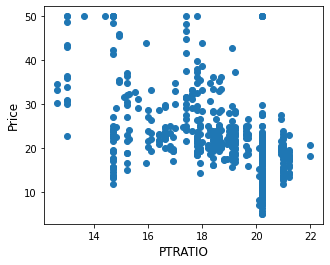

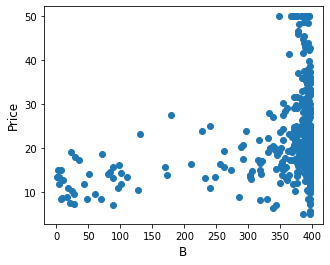

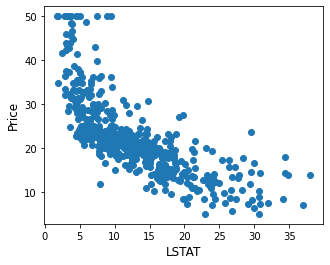

<AxesSubplot:>

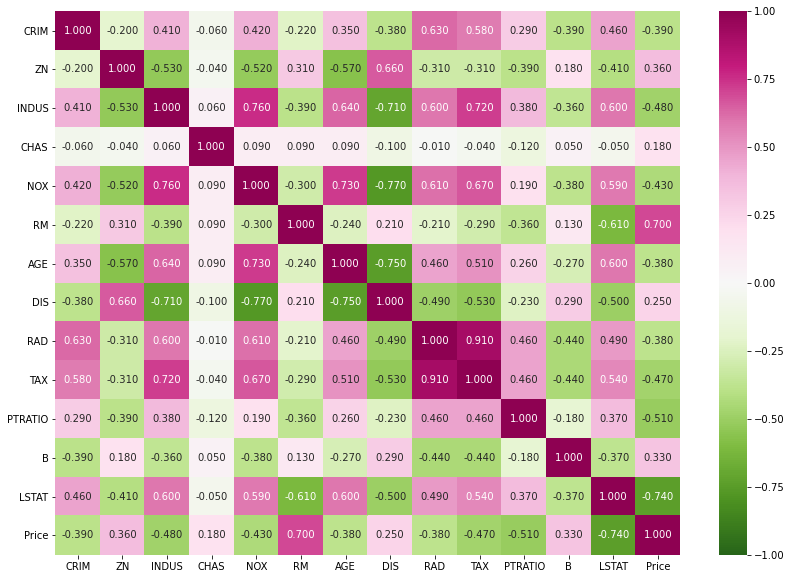

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
# Changing data into Pandas dataframe
boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd.head()
#Adding target to the dataset
boston_pd['Price'] = boston.target
boston_pd.head()
#Plotting each feature against target 
for i, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, i], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()
# Plotting each feature against target using Heatmap
plt.figure(figsize = (14, 10))
sbn.heatmap(boston_pd.corr().round(2),annot=True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r)
# Observations :
#1. RM i.eaverage number of rooms per dwelling has strong positive correlation with target
#2. LSTAT i.e % lower status of population has strong negative correlation with target
#3. RAD i.e index of accessibility to radial highways and TAX i.e full value property tax rate per $10,000 have strong positive correlation
#4. AGE i.e proportion of owner-occupied units built prior to 1940 has strong correlation with DIS i.e weighted distances to five Boston employment centres
#   and NOX i.e nitric oxides concentration (parts per 10 million) which are examples of multicollinearity
# RAD & TAX also have multi collinearity



### b. Store all the features and targets into X and Y respectively. How many instances and how many features does the dataset have? Split the data into 70% training set and 30% test set.

In [273]:
print("Shape of Dataset")
print(boston_pd.shape) # There are 506 instances,13 features and 1 target variable in dataset
print("\n")
X = boston_pd.iloc[:,0:13] #Storing all features into X 
#X.head()
Y = boston_pd.iloc[:,13:14] # Storing target into Y
#Y.head()
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
X_train.head()

Shape of Dataset
(506, 14)




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12


### c. Train a linear regression model using  selected feature. 

In [34]:
#Basis observations from correlation matrix it can be observed that features RM & LSTAT have strong correlation with target variable
X_selected = boston_pd.loc[:, ['RM','LSTAT']] # Since columns have labels using loc to slice required data
#X_selected.head()
Y_selected = boston_pd.loc[:, ['Price']]
#Y_selected.head()
scalar = MinMaxScaler()
scalar.fit(X_selected) # Scaling features
X_selected = scalar.transform(X_selected)
scalar.fit(Y_selected) # Scaling target variable
Y_selected = scalar.transform(Y_selected)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y_selected, test_size = 0.3, random_state=1)
print("Training set shape")
print(X_train.shape)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

Training set shape
(354, 2)


### d. Test the model using the test set. Report sklearn.metrics.mean squared error and sklearn.metrics.r2 score between the predicting result and target.

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
#out =y_test.to_numpy()
mean_squared_error = (mean_squared_error(y_test, y_pred))
print("Mean Squared Error")
print(mean_squared_error)
print("\n")
print("r2 score")
r2 = r2_score(y_test, y_pred)
print(r2)
print("\n")


Mean Squared Error
0.014288637699302007


r2 score
0.6843090583339465




In [42]:
#Evaluating model by calculating training data

from sklearn.metrics import mean_squared_error,r2_score
predict_y_train = regressor.predict(X_train)
mse_training = mean_squared_error(y_train, predict_y_train)
print("Mean Square Error for training set")
print(mse_training)
print("\n")
print("r2 score")
r2_score_training = r2_score(y_train, predict_y_train)
print(r2_score_training)
print("\n")
#Observations :
# r2 score and mse of training and test sets are similar which shows model is a good fit   

Mean Square Error for training set
0.0156397692209786


r2 score
0.6099162694401528




In [48]:
# Training model with all features

X_selected = boston_pd.iloc[:,0:13] # Selecting all features
Y_selected = boston_pd.iloc[:, 13:14]
#Scaling the features and target
scalar = MinMaxScaler()
scalar.fit(X_selected) # Scaling features
X_selected = scalar.transform(X_selected)
scalar.fit(Y_selected) # Scaling target variable
Y_selected = scalar.transform(Y_selected)
#Splitting data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y_selected, test_size = 0.3, random_state=2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = (mean_squared_error(y_test, y_pred))
print("Mean Sqaure Error")
print(mse)
print("\n")
r2 = r2_score(y_test, y_pred)
print("r2 score")
print(r2)
print("\n")



Mean Sqaure Error
0.011377191538905458


r2 score
0.7330247212691929




In [50]:
# Training model with features except features having multicollinearity (i.e removing AGE, DIS, RAD,TAX)

X_selected = boston_pd.loc[:, ['CRIM','ZN','INDUS','CHAS','NOX','RM','PTRATIO','B','LSTAT']] # Selecting all features
Y_selected = boston_pd.loc[:, ['Price']]
#Scaling the features and target
scalar = MinMaxScaler()
scalar.fit(X_selected) # Scaling features
X_selected = scalar.transform(X_selected)
scalar.fit(Y_selected) # Scaling target variable
Y_selected = scalar.transform(Y_selected)
#Splitting data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y_selected, test_size = 0.3, random_state=2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = (mean_squared_error(y_test, y_pred))
print("Mean Sqaure Error")
print(mse)
print("\n")
r2 = r2_score(y_test, y_pred)
print("r2 score")
print(r2)
print("\n")


Mean Sqaure Error
0.012910915375810355


r2 score
0.6970346135652348




Observations :
1.It can be observed that model has performed better in terms of r2 score when trained with all features but features with multicollinearity should not be used to train regression model.(reference - https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r/1150#1150)
2.So multicollinear features are removed and model is trained with other features.It can be observed that r2 score and MSE for this model are 0.69 & 0.012 respectively which shows that model is a good fit
3.When model is trained with only 2 features having strong influence on target r2 score and MSE observed were 0.68 & 0.014